In [2]:
import numpy as np
import random
import math

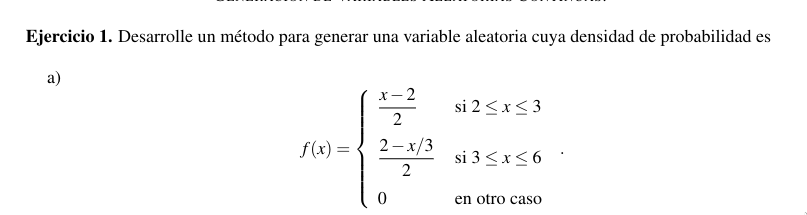


In [ ]:
def f_eja(x):
  if x >= 2 and x <= 3:
    return (x-2)/2
  if x >= 3 and x <= 6:
    return (2-x/3)/2
  else:
    return 0

# G = F^-1
def G(x):
  if x < 1/4:
    return 2 + np.sqrt(x)
  else:
    return 6 - 2*np.sqrt(3-3*x)

def esperanza_eja_calc(nsim):
  E = 0
  for i in range(2, nsim+2):
    E += i * f_eja(i)
  return E

def esperanza_eja(nsim):
  E = 0
  for _ in range(nsim):
    u = random.random()
    E += G(u)
  return E / nsim

print(esperanza_eja(1_000_000))
print(esperanza_eja_calc(1000))

3.5829798700569153
3.6666666666666665



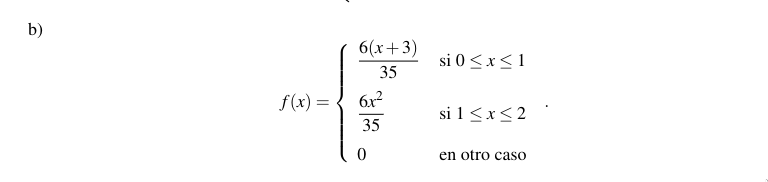


In [ ]:
def f(x):
  if x >= 0 and x <= 1:
    return 6*(x+3)/35
  elif x >= 1 and x <=2:
    return (6*x**2)/35
  else:
    return 0

def G_b(x):
  if x < 3/5:
    return -3 + (np.sqrt((35*x + 27) / 3))
  else:
    return ((35*x - 19) / 2)**(1/3)


def ej1_b():
  u = random.random()
  return G_b(u)

def esperanza_posta(nsim):
  E = 0
  for i in range(nsim):
    E += i * f(i)
  return E

nsim = 1_000_000
E = 0
for _ in range(nsim):
  E += ej1_b()

#print(esperanza_posta(nsim)) 2.057142857142857
print(E/nsim)

0.9564703458777997


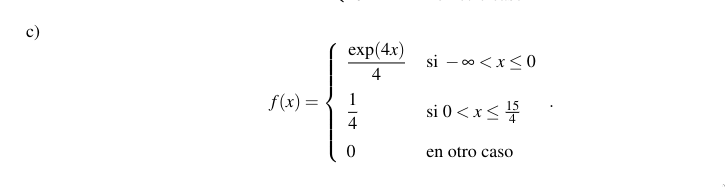

In [ ]:
def f_ejc(x):
  if x <= 0:
    return np.exp(4*x)/4
  elif x > 0 and x <= 15/4:
    return 0.25
  else:
    return 0

# G = F-1
def G_c(x):
  if x < 1/16:
    return np.log(16*x)/4
  elif x > 1/16 and x <= 15/16:
    return (x - 1/16)*4
  else:
    return 1

def esperenza_ejc_calc(nsim):
  E = 0
  for i in range(nsim):
    E += i * f_ejc(i)
  return E

def esperanza_ej(nsim):
  E = 0
  for i in range(nsim):
    E += G_c(random.random())
  return E/nsim

nsim = 1_000_000
print(esperenza_ejc_calc(nsim))
print(esperanza_ej(nsim))


1.5
1.5793054536462836


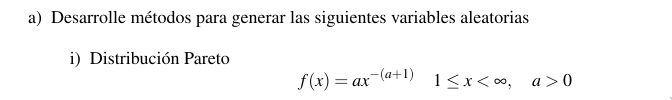


In [ ]:
# Tiene distribución acumulada F con forma
# cerrada, por lo cual puede aplicarse el método de la transformada Inversa
'''

F(x) = -x**(-a)
=> G(x) = F^-1(x) = (-x)**(-1/a)

'''
def pareto(a):
  u = random.random()
  return (1-u) ** (-1/a)

# 3.28986613369554
def esperanza_pareto_calc(a, nsim):
  E = 0
  for i in range(1,nsim):
    E += i * a*(i**(-(a+1)))
  return E

def esperanza_pareto(a, nsim):
  sum = 0
  for _ in range(nsim):
    sum += pareto(a)
  return sum / nsim

a = 2
nsim = 1_000_000
print(esperanza_pareto(a, nsim))
print(esperanza_pareto_calc(a, nsim))

1.9988622761109427
3.28986613369554


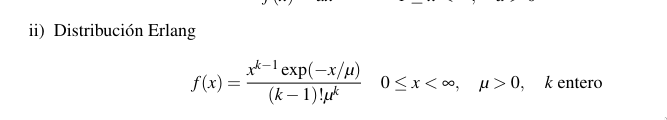


In [ ]:
'''
Pertenece a la familia de las gammas, puede simularse como
sumas de exponenciending

Veamos rechazo
  f'(x) = (k * u * x**(k-1) + e**(-x/u)) / u * ( (k-1)! * u**k )


'''

def Erlang():
  pass


SyntaxError: incomplete input (<ipython-input-33-2a1287fac0ac>, line 11)

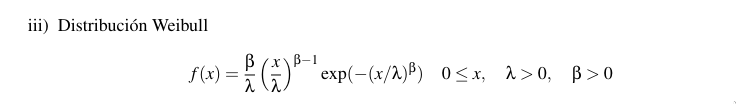


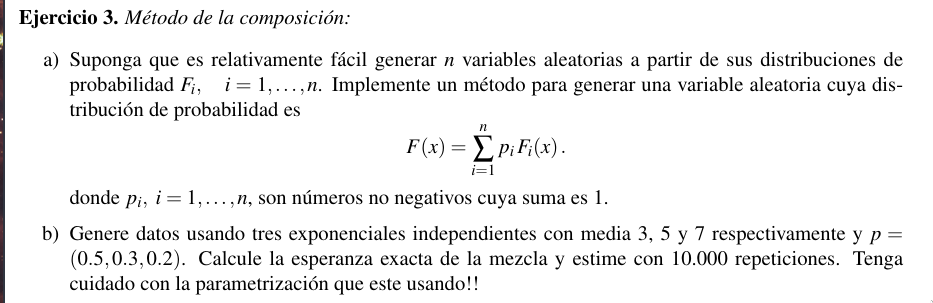


In [ ]:
from random import random
import numpy as np

def AcumuladaExponencial(lamda,x):
  return -np.log(1-x)/lamda

# P,lamda: array of float, F: (lamda, float) -> float
def generador(p, lamda, F):
  u = random()
  sum = 0
  for i in range(len(p)):
    sum += p[i] * F(lamda[i], u)
  return sum

def Esperanza(nsim):
  p = [0.5, 0.3, 0.2]
  lamda = [1/3, 1/5, 1/7]
  sum = 0
  for _ in range(nsim):
    sum += generador(p, lamda, AcumuladaExponencial)
  return sum / nsim

print(Esperanza(1_000_000))


4.40502248461799


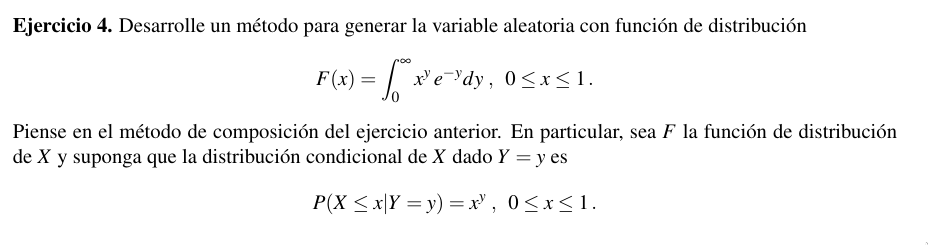

In [ ]:
def fx(x, y):
  return (x**y) * np.exp(-y)

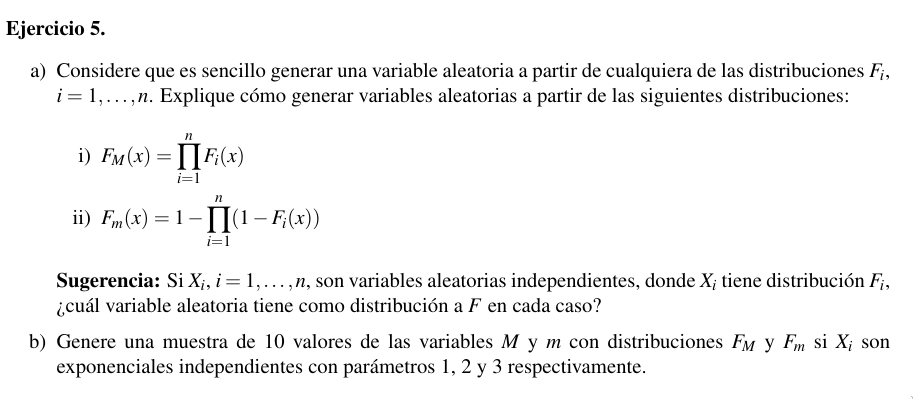


In [ ]:
def FM(F):
  return max([F(1, random.random()),
              F(1/2, random.random()),
              F(1/3, random.random())
              ])

def Fm(F):
  return 1 - min([F(1, 1-random.random()),
              F(1/2, 1-random.random()),
              F(1/3, 1-random.random())
              ])

M = []; m = [];
def F5(lamda, x):
  return -np.log(1-x) / lamda

for _ in range(10):
  M.append(FM(F5))
  m.append(Fm(F5))

print(m)
print(M)

[0.528784460465193, 0.11465639331180144, 0.9279640345324545, -0.33763192242317985, -2.3465879785669044, 0.903795919345845, 0.5487162181091373, 0.1542801545976249, 0.797837307397554, -1.0484297717549969]
[1.9783771574257472, 4.437420267182336, 1.54218779302294, 2.465300457749346, 2.223100951150347, 10.15287152744142, 2.4155394623714743, 15.84836062894981, 0.6630802815309658, 4.36273593098785]


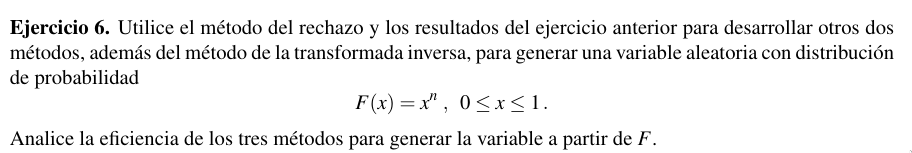

In [ ]:
# Transformada inversa
# F^-1 = x ** (1/n)
def TransInversa(n):
  return random.random()**(1/n)

# Aceptacion y rechazo
def AcepRechazo(n):
  while True:
      u = random.random()
      y = random.random()
      #c = n
      if u < (y**(n-1))/(n-1):
            return y
# Composicion
def Composicion(n):
  m = -1
  for i in range(n):
    m = max(m, random.random())
  return m

def Esperanzas(nsim, n):
  ETI = 0
  EAR = 0
  EC = 0
  for _ in range(nsim):
    ETI += TransInversa(n)
    EAR += AcepRechazo(n)
    EC += Composicion(n)

  print(f"TI: {ETI/nsim}")
  print(f"AR: {EAR/nsim}")
  print(f"EC: {EC/nsim}")



Esperanzas(1_000_000, 10)

TI: 0.9090943230389267
AR: 0.9091078581127958
EC: 0.9091262230286976


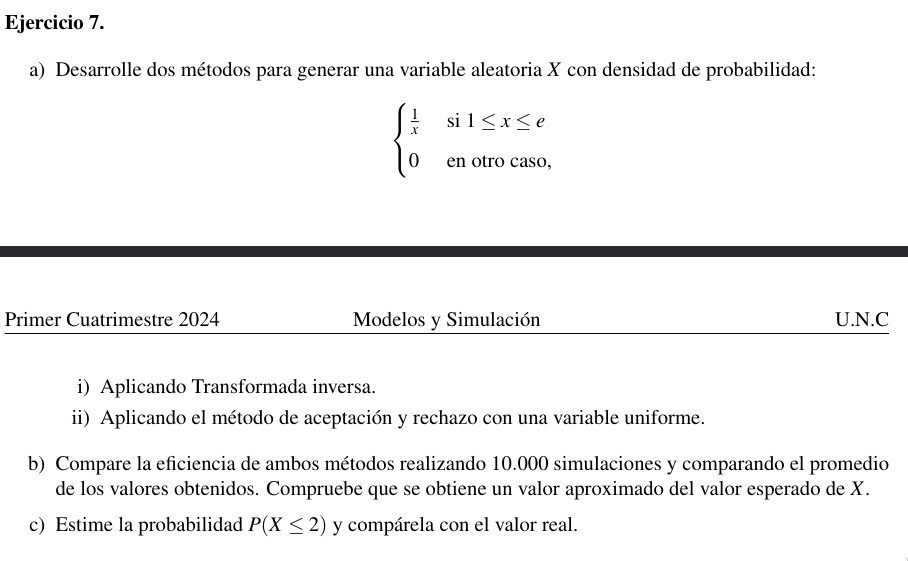

In [3]:
def TransInversaEj7():
  return np.exp(random.random())

def AceptacionRechazo():
  # if U < f(Y) / (c * g(Y)):
  while True:
    u = random.random()
    y = random.uniform(1, np.e)
    if u < (1/y):
      return y

def Esperanzas(nsim):
  sumT = 0
  sumAR = 0
  for _ in range(nsim):
    sumT += TransInversaEj7()
    sumAR += AceptacionRechazo()

  print(f"Trans {sumT/nsim}")
  print(f"Aceptacion Rechazo {sumAR/nsim}")


Esperanzas(1_000_000)
print(f"Esperanza exacta: {np.e - 1}")

# B
# Calculates P(X<=a) for each method
def probabilidadEj7(a, nsim):
  pTI = 0
  pAR = 0
  for _ in range(nsim):
    uTI = TransInversaEj7()
    uAR = AceptacionRechazo()
    if uTI <= a:
      pTI += 1
    if uAR <= a:
      pAR += 1

  print(f"P(X<={a})")
  print(f"Valor Exacto para Ejercicio 7: {np.log(a)}")
  print(f"Transformada Inversa: {pTI/nsim}")
  print(f"Aceptacion y Rechazo: {pAR/nsim}")


probabilidadEj7(2, 1_000_000)

Trans 1.718597446411862
Aceptacion Rechazo 1.71842894087376
Esperanza exacta: 1.718281828459045
P(X<=2)
Valor Exacto para Ejercicio 7: 0.6931471805599453
Transformada Inversa: 0.694206
Aceptacion y Rechazo: 0.69394


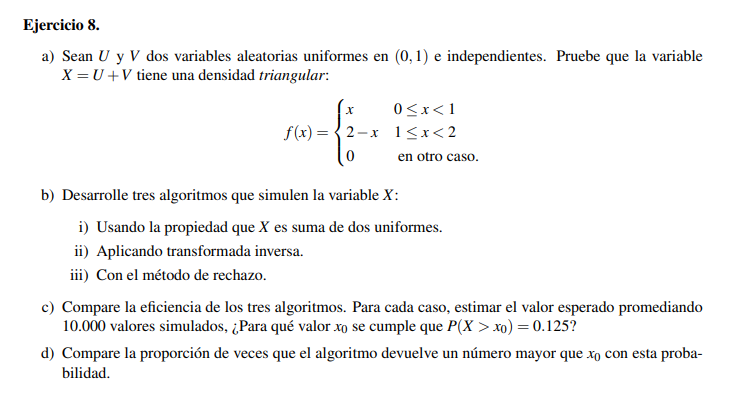


In [ ]:
def fEj8(x):
  if 0 <= x and x < 1:
    return x
  if 1 <= x and x < 2:
    return 2 - x
  else:
    return 0

def SumaDeUniformesEj8():
  u = random.random()
  v = random.random()
  return u + v

def TransformadaInversaEj8():
  u = random.random()
  if u < 1/2:
    return np.sqrt(2*u)
  else:
    return 2 - np.sqrt(2-2*u)

# Y~U(0,2) => g(y) = 1/2
def AceptacionRechazoEj8():
  c = 2
  while True:
    u = random.random()
    y = random.uniform(0, 2)
    if u < fEj8(y) / (c *(1/2)):
      return y

def EsperanzasEj8(nsim):
  ETI = 0
  EAR = 0
  ESU = 0
  for _ in range(nsim):
    ETI += TransformadaInversaEj8()
    EAR += AceptacionRechazoEj8()
    ESU += SumaDeUniformesEj8()

  print(f"Esperanza exacta: {1}")
  print(f"Transformada Inversa: {ETI/nsim}")
  print(f"Aceptacion y Rechazo: {EAR/nsim}")
  print(f"Suma de dos Uniformes: {ESU/nsim}")

#P(X > x0) = 0.125 => P(X <= x0) = 0.875
# Esta funcion calcula la proporcion de numeros generados
# que son mas que a
def Ej8c(a, nsim):
  PTI = 0
  PAR = 0
  PSU = 0

  for _ in range(nsim):
    if TransformadaInversaEj8() > a:
      PTI += 1
    if AceptacionRechazoEj8() > a:
      PAR += 1
    if SumaDeUniformesEj8() > a:
      PSU += 1

  print(f"Transformada Inversa: {PTI/nsim}")
  print(f"Aceptacion y Rechazo: {PAR/nsim}")
  print(f"Suma de dos Uniformes: {PSU/nsim}")


# Para 1.5 deberia ser 0.125
Ej8c(1.5, 1_000_000)


Transformada Inversa: 0.125076
Aceptacion y Rechazo: 0.124963
Suma de dos Uniformes: 0.124915


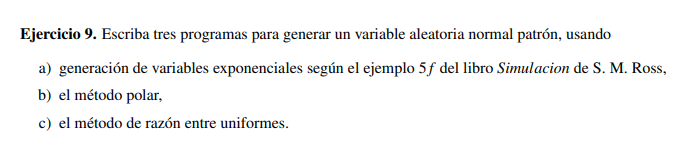

In [ ]:
def exponencial():
  u = 1-random()
  return -np.log(1-u)

def AceptacionRechazoEj9(sigma, mu):
    while True:
        y1 = -np.log(1-random.random())
        y2 = -np.log(1-random.random())
        if y2>((y1-1)**2)/2:
            if random.random()<0.5:
                return (y1*sigma) + mu
            else:
                return (-y1*sigma) + mu

def MetodoPolar(sigma, mu):
  Rcuadrado = -2 * np.log(1 - random.random())
  Theta = 2 * np.pi * random.random()
  X = np.sqrt(Rcuadrado) * np.cos(Theta)
  Y = np.sqrt(Rcuadrado) * np.sin(Theta)
  return (X * sigma + mu, Y * sigma + mu)

NV_MAGICCONST = 4 * np.exp(-0.5) / np.sqrt(2.0)
def NormalVariate(sigma, mu):
  while 1:
    u1 = random.random()
    u2 = 1.0 - random.random()
    z = NV_MAGICCONST * (u1 - 0.5) / u2
    zz = z * z / 4.0
    if zz <= -np.log(u2):
      break
  return mu + z * sigma

def MediaEj9(sigma, mu, nsim):
  AceptacionRechazo = np.zeros(nsim)
  MetodoPolar = np.zeros(nsim)
  NormaVariate = np.zeros(nsim)

  for i in range(nsim):
    AceptacionRechazo[i] = AceptacionRechazoEj9(sigma, mu)
    MetodoPolar[i] = MetodoPolar(sigma, mu)
    NormaVariate[i] = NormalVariate(sigma, mu)

def EsperanzasEj9(nsim):
  EMP = 0
  EAR = 0
  ENV = 0
  for _ in range(nsim):
    EAR += AceptacionRechazoEj9(1,1)
    EMP += MetodoPolar(1,1)[0]
    ENV += NormalVariate(1,1)

  print(f"Esperanza exacta: {1}")
  print(f"Aceptacion y Rechazo: {EAR/nsim}")
  print(f"Metodo Polar: {EAR/nsim}")
  print(f"Razon entre Uniformes: {EAR/nsim}")

EsperanzasEj9(1_000_000)


Esperanza exacta: 1
Aceptacion y Rechazo: 1.998380678508813
Metodo Polar: 1.998380678508813
Razon entre Uniformes: 1.998380678508813


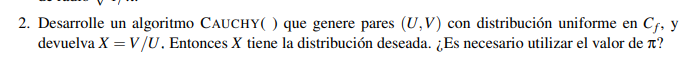

In [ ]:
def Cauchy():
  while True:
    u = random.random()
    v = random.random()
    if u**2 + v**2 <= 1/np.sqrt(np.pi):
      return v/u

def CauchyL(lamda):
  while True:
    u = lamda * random.random()
    v = lamda * random.random()
    if u**2 + v**2 <= 1/np.sqrt(np.pi):
      return v/u


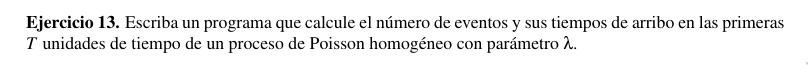

In [ ]:
def eventosPoisson(lamda,T):
  t = 0
  NT = 0
  Eventos = []
  while t < T:
    U = 1 - random.random()
    t += - np.log(U) / lamda
    if t <= T:
      NT += 1
      Eventos.append(t)
  return NT, Eventos

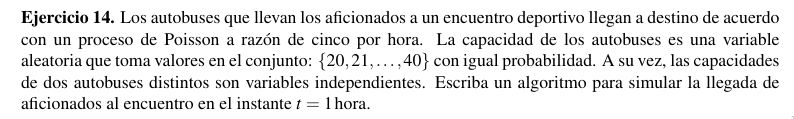




In [ ]:
def simulacion_autobuses():
  cantidad_espectadores = 0
  for _ in range(eventosPoisson(5, 1)[0]):
    cantidad_espectadores += random.randint(20, 40)
  return cantidad_espectadores
'''
Para el calculo teorico, hacemos
Y cantidad de espectadores, Xi (i-esimo autobus) ~ U(20,40) y E[Xi] = 30

Tenemos que E[Y] = sum_1_N(1) E[Xi]
                 = sum_1_N(1) 30
                 = 30 * N(1)

Como N(t) ~ P(5*t), entonces N(1) = 5*1 = 5
luego E[Y] = 150

Veamos si las simulaciones da parecido, pues no xd
'''
nsim = 1_000_000
s = 0
for _ in range(nsim):
  s += simulacion_autobuses()
print(s/nsim)




150.00865


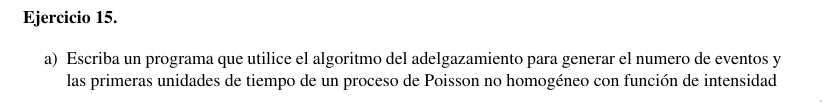

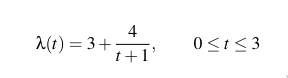

In [ ]:
from random import random
from numpy import log

def ej15a(t):
  return 3 + 4 / (t+1)

def ej15b(t):
  return (t-2)**2 - 5*t + 17

def Poisson_no_homogeneo_adelgazamiento(T, lamda_t, lamda):
  'Devuelve el n´umero de eventos NT y los tiempos en Eventos'
  'lamda_t(t): intensidad, lamda_t(t)<=lamda'
  NT = 0
  Eventos = []
  U = 1 - random()
  t = -log(U) / lamda
  while t <= T:
    V = random()
    if V < lamda_t(t) / lamda:
      NT += 1
      Eventos.append(t)
    t += -log(1 - random()) / lamda
  return NT, Eventos

# Debemos elegir un lambda tal que l >= lamda(t) para todo t, es creciente
# Entonces l = l(3) = 3
print(Poisson_no_homogeneo_adelgazamiento(6, ej15a, 3)[0])
print(Poisson_no_homogeneo_adelgazamiento(6, ej15a, ej15a(5))[0])

25
27
